In [1]:
using Turing, Random, AdvancedVI, DelimitedFiles, DataFrames
using Plots
Random.seed!(0);

In [2]:
#Generate data
T = 400

vz, vy = 0.01, 0.1

z_data_0 = 0
z_data = [sin(pi/60) + sqrt(vz)*randn()]
x_data_0 = 0
x_data = [x_data_0 + sqrt(exp(z_data[1]))*randn()]
y_data = [x_data[1]+sqrt(vy)*randn()]
for t=2:T
    append!(z_data, sin(t*pi/60) + sqrt(vz)*randn())
    append!(x_data, x_data[end] + sqrt(exp(z_data[end]))*randn())
    append!(y_data, x_data[end]+sqrt(vy)*randn())
end

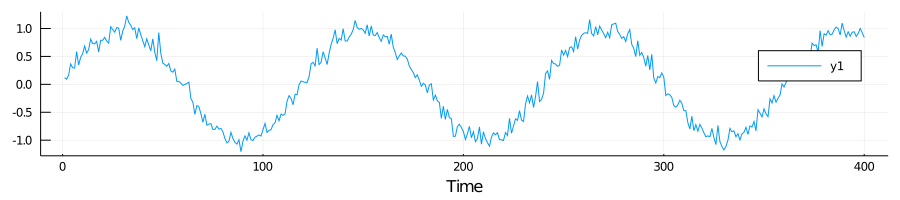

In [3]:
plot(z_data, xlabel="Time", size=(900,200))

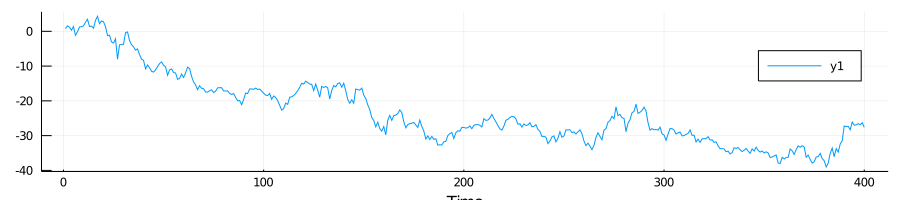

In [4]:
plot(y_data, xlabel="Time", size=(900,200))

In [5]:
@model function HGF(m_z_t_min, v_z_t_min, m_x_t_min, v_x_t_min, y_t)
    model_vz, model_vy = 0.1, 0.1
    z_t_min ~ Normal(m_z_t_min, sqrt(v_z_t_min))
    z_t ~ Normal(z_t_min, sqrt(model_vz))
    x_t_min ~ Normal(m_x_t_min, sqrt(v_x_t_min))
    x_t ~ Normal(x_t_min, sqrt(exp(z_t)))
    y_t ~ Normal(x_t, sqrt(model_vy))
end

HGF (generic function with 1 method)

In [6]:
# Define values for prior statistics
m_z_0, v_z_0 = 0.0, 1.0
m_x_0, v_x_0 = 0.0, 1.0

m_z_t_min, v_z_t_min = m_z_0, v_z_0
m_x_t_min, v_x_t_min = m_x_0, v_x_0

advi = ADVI(10, 4000)

m_z = Vector{Float64}(undef, T)
v_z = Vector{Float64}(undef, T)
m_x = Vector{Float64}(undef, T)
v_x = Vector{Float64}(undef, T)

total_time = 0.0

for t=1:T
    model = HGF(m_z_t_min, v_z_t_min, m_x_t_min, v_x_t_min, y_data[t])
    etime = @elapsed q = vi(model, advi);
    total_time += etime
    samples = rand(q,1000)
    m_z_t_min, v_z_t_min, m_x_t_min, v_x_t_min = mean(samples[2,:]), var(samples[2,:]), mean(samples[4,:]), var(samples[4,:])
    m_z[t], v_z[t], m_x[t], v_x[t] = m_z_t_min, v_z_t_min, m_x_t_min, v_x_t_min
end

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 13907813070233161534
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
[ADVI] Optimizing...100% Time: 0:00:02
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 14038466220624497604
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 4101881420730518838
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 5430952951469918331
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 4638448386055883309
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should on

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 8705576952449060154
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 2475143396145394063
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 7527310171560093595
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 3992016826796107865
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 4722419749894041147
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ


┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 15161016335038861771
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 6132117572818405248
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 3778279890163164423
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 5399747725540506255
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 7092600779024974570
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 1804407332821475216
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 18247973750694700782
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 1303166639491316813
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 11487219028397316141
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 16306623292658578089
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 6199345160685641513
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 8574586054884374013
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 17614228270388582850
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 15341341141485152696
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 1024412672500521130
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for 

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 3745787685034581557
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 13690652485494581448
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 12257467988087665027
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 11162509746162691734
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 10568544274456573836
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created fo

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 5225655289555925547
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 4048947771732312906
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 1864593844646281128
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 10839074310905335521
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 13401797105858076620
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for 

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 5411419893546140159
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 14178939289675068710
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 4479371118873891347
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 7333028360377948267
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 7181172137815346727
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 4515258334444886878
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 13933014760687753261
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 14919000736043901224
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 3699408659774433121
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 7725199930302175597
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for 

┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 10486405597685456510
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 14237765541840544894
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199
┌ Info: [ADVI] Should only be seen once: optimizer created for θ
│   objectid(θ) = 4170585637416506883
└ @ AdvancedVI /home/polyten/.julia/packages/AdvancedVI/8ttTK/src/AdvancedVI.jl:199


In [7]:
total_time

95.43313421800002

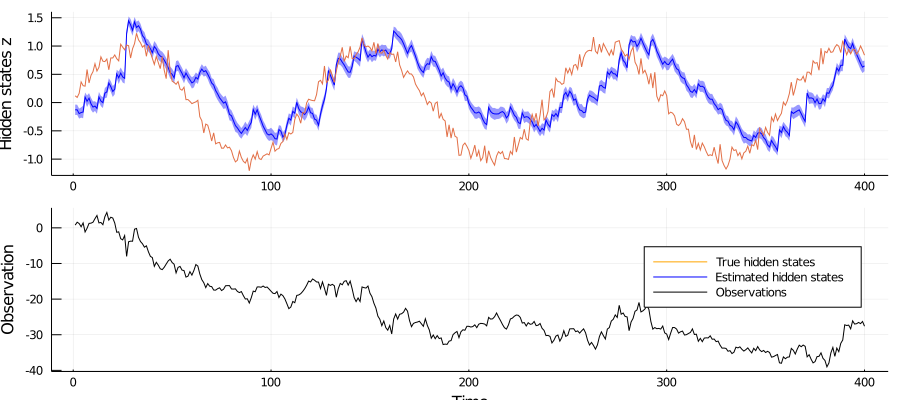

In [8]:
gr()
l = @layout [a ; b]

p1 = plot(m_z, ribbon=v_z, fillalpha=0.4, lw=1, color=:blue, label="Estimated hidden states",legend=false, yaxis="Hidden states z")
plot!(z_data,lw=1,label="True hidden states")

p2 = plot([fill(NaN, T) fill(NaN, T) y_data], lw=1, color=[:orange :blue :black], label=["True hidden states" "Estimated hidden states" "Observations"], legend=:topright, xaxis="Time", yaxis="Observation", link=:x)

p = plot(p1, p2, layout = l, size = (900, 400))

In [9]:
writedlm("ADVImeanestimates.txt", m_z)
writedlm("ADVIvarestimates.txt", v_z)